<a href="https://colab.research.google.com/github/Annaseanna/Simulacion-de-sistemas/blob/main/Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Practica 2 - Simulacion de sistemas**
***Anna Ospina Bedoya***

A los vendedores de una tienda de bicicletas les pagan un bono si venden más de 4 bicicletas diarias. La probabilidad de vender más de 4 bicicletas es sólo 0.4. Si el número de bicicletas vendido es mayor que 4, la distribución de las ventas es la siguiente:

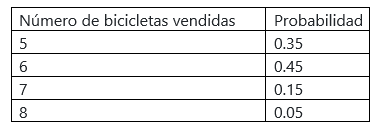

La tienda tiene 4 modelos de bicicletas y el bono depende del modelo vendido. Para el modelo A el bono es de *10*; 40% de las bicicletas vendidas son de ese tipo. El modelo B representa el 35% de las ventas y paga un bono de *15*. El modelo C paga un bono de *20* y representa el 20% de las ventas y el modelo D tiene un bono de *25* y representa sólo el 5% de las ventas. 

---------- Practica 2 - Simulacion de Sistemas ----------
-- Punto 1 --
Ingrese el numero de dias con los que desee saber el valor esperado del bono de un vendedor
100
El valor esperado de el bono que un vendedor puede obtener en un dia es:$8.85

-- Punto 2 --
El numero de interacciones necesarias es 982.45
-- Punto 3 --
El minimo de las utilidades es 0
El maximo de las utilidades es 85
El promedio de las utilidades es 11.0
La mediana de  de las utilidades es 0.0
La desviacion de  de las utilidades es 11.0±0.31


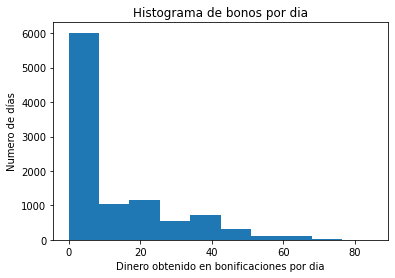

In [5]:
from os import setxattr
import random
import matplotlib.pyplot as plt

#Se define una funcion que calcula el numero de bicicletas vendidas por dia
def vendidas():
  #Se declara una variable que guarda el numero de ventas dependiendo de lo obtenido en la variable seudoaleatoria dia
  n_vendidas=0
  dia=random.random()
  if dia <0.4:
    ventas=random.random()
    if ventas<0.35:
      n_vendidas+=1
    elif ventas<0.80:
      n_vendidas+=2
    elif ventas<0.95:
      n_vendidas+=3
    else:
      n_vendidas+=4
  else: #La variable n_vendidas es igual a 0 si la variable pseudoaleatoria dia entra en el 60% que vendieron un valor menor o igual a 4
    n_vendidas=0  
  return n_vendidas  

#Funcion que calcula el bono dependiendo del tipo de bicicleta
def calculo_bono():
  bono=0
  tipo=random.random()
  if tipo<0.4:
    bono+=10
  elif tipo<0.75:
    bono+=15
  elif tipo<0.95:
    bono+=20
  else:
    bono+=25
  return bono  

#Funcion que calcula con base a los dias las ganancias de un trabajador en bonos
def bono_dia(N):
  lista=[]
  #Se construye un for que recorre segun los dias a calcular
  for i in range(N):
    a=vendidas() #Se llama a la funcion que calcula el numero de bicletas adicionales que se vendieron
    if a==0: #Si no se obtuvo mas de 4 ventas se va a agregar a la lista de bonos el valor de 0
      lista.append(0)
    else:
      #En caso de que si se hayan tenido mas de 4 ventas se calculara un iterador que sume la cantidad de dinero que se obtuvo por dias
      sum=0
      for j in range(a):
        b=calculo_bono()#Se llama a la funcion que calcula que tipo de bicicleta vendio de mas
        sum+=b
      lista.append(sum)#Se agrega la suma de los bonos por dias en una lista
  return lista
print("---------- Practica 2 - Simulacion de Sistemas ----------") 
print("-- Punto 1 --") 
#Valor Esperado   
print("Ingrese el numero de dias con los que desee saber el valor esperado del bono de un vendedor")
N=int(input())
valorE=bono_dia(N)
valorEsperado=sum(valorE)/N
print(f'El valor esperado de el bono que un vendedor puede obtener en un dia es:${valorEsperado}\n')

print("-- Punto 2 --") 
porBici=bono_dia(100)
#Funcion que calcula la desviacion o a "s" dependiendo del parametro a 
def desviacion(lista,n,a):
  promedioBonos=sum(lista)/n      
  #A cada xi le resto el promedio al cuadrado 
  x=[(i-promedioBonos)**2 for i in lista]
  #Si a es verdadero calcula la desviacion
  if a:
    desviacion=(sum(x)/n)**(1/2)
  #Si a es falso calcula la s
  else:
    desviacion=(sum(x)/n-1)**(1/2) 
  return desviacion
#Numero de interacciones
#El estadistico z con precision del 95% nos dio un resultado de 1.96
#Y se aplica la formula para calcular el numero de interacciones
n=round(((1.96)**2)*((desviacion(porBici,100,True))**2),2)
print(f'El numero de interacciones necesarias es {n}')

#Punto 3
print("-- Punto 3 --") 
#Se llama a la funcion bono_dia con el parametro del numero de dias que queremos calcular
hist=bono_dia(10000)
#Inciso a
#Se hace uso de la libreria matplotlib para graficar un histograma
plt.hist(hist)
plt.title("Histograma de bonos por dia")
plt.xlabel("Dinero obtenido en bonificaciones por dia")
plt.ylabel("Numero de días")
#Inciso b
print(f'El minimo de las utilidades es {min(hist)}')
print(f'El maximo de las utilidades es {max(hist)}')
print(f'El promedio de las utilidades es {round((sum(hist)/10000),2)}')
#Funcion para calcular la mediana
def mediana(hist):
  hist.sort()
  if len(hist) % 2 ==0:
    a=len(hist)/2
    b=(len(hist)/2)+1
    c=(hist[int(a)]+hist[int(b)])/2
    return c
  else:
    a=len(hist)/2
    return hist[int(a)]
print(f'La mediana de  de las utilidades es {mediana(hist)}')
#Inciso c
print(f'La desviacion de  de las utilidades es {round((sum(hist)/10000),2)}±{round((1.960201*(desviacion(hist,10000,False)))/(10000**(1/2)),2)}')